In [2]:
import keras 
from keras.layers import LSTM,Dense,Conv1D,MaxPooling1D
from keras.models import Sequential,Model
from gensim.models import Word2Vec
from keras.layers import Bidirectional,TimeDistributed
import numpy as np
import codecs
import regex
import  matplotlib.pyplot as plt

In [2]:
data_div=1
sent=[]
tags=[]
with codecs.open("v1_train.hi","r",encoding="utf-8") as f:
    l1=[]
    l2=[]
    for i in f:
        x=i.split()
        if(x[0]=="newline"):
            sent.append(l1)
            tags.append(l2)
            l1=[]
            l2=[]
        else:
            l1.append(x[0])
            l2.append(x[1])

In [3]:
print(len(sent))
tag_count=0
for i in tags:
    for j in i:
        if(j!="other"):
            tag_count+=1
print(tag_count)
tag_map={'datenum': 0,
 'event': 0,
 'location': 0,
 'name': 0,
 'number': 0,
 'occupation': 0,
 'organization': 0,
 'other': 0,
 'things': 0}
for i in tags:
    for j in i:
        tag_map[j]+=1
print(tag_map)
print()

76537
330826
{'organization': 12254, 'event': 2932, 'location': 166547, 'other': 1141207, 'occupation': 15732, 'number': 37754, 'name': 88887, 'things': 4048, 'datenum': 2672}



In [4]:
from sklearn.model_selection import train_test_split
sent,pre_x_test,tags,pre_y_test=train_test_split(sent,tags,test_size=0.1,random_state=1)
print(len(sent))
print(len(tags))
print(len(pre_x_test))
print(len(pre_y_test))

/home/sagar/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/sagar/tensorflow/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


68883
68883
7654
7654


0 : 4616
1 : 7371
2 : 10244
3 : 9461
4 : 8464
5 : 6793
6 : 5140
7 : 7320
8 : 4155
9 : 2456
10 : 952
11 : 654
12 : 430
13 : 267
14 : 156
15 : 103
16 : 75
17 : 57
18 : 41
19 : 25
20 : 19
21 : 14
22 : 8
23 : 11
24 : 2
25 : 3
26 : 3
27 : 2
28 : 3
29 : 1
30 : 4
32 : 2
33 : 1
34 : 2
35 : 1
36 : 1
37 : 4
38 : 3
39 : 1
41 : 1
42 : 2
45 : 2
47 : 2
48 : 1
53 : 1
62 : 1
67 : 1
71 : 1
95 : 1
100 : 1
161 : 1
175 : 1
192 : 1
196 : 1


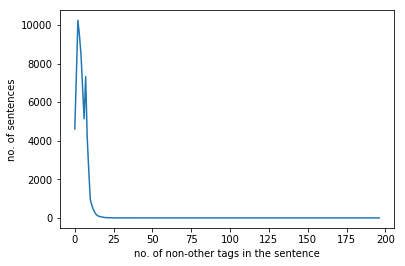

In [5]:
def get_data_distribution(sent,tags):
    cnt_dict={}
    for i in tags:
        cnt=0
        for j in i:
            if(j!="other"):
                cnt+=1
        if(cnt in cnt_dict):
            cnt_dict[cnt]+=1
        else:
            cnt_dict[cnt]=1
    cnt_list=list(cnt_dict.keys())
    cnt_list.sort()
    l1=[]
    l2=[]
    for i in cnt_list:
        print(i,":",cnt_dict[i])
        l1.append(i)
        l2.append(cnt_dict[i])
    plt.plot(l1,l2)
    plt.xlabel("no. of non-other tags in the sentence")
    plt.ylabel("no. of sentences")
    plt.show()
get_data_distribution(sent,tags)

In [6]:
def filter_data(sent,tags,exclude_list):
    sent_filter=[]
    tags_filter=[]
    for i in range(len(tags)):
    #     print(tags[i])
        cnt=0
        for j in tags[i]:
            if(j!="other"):
                cnt+=1
        if(cnt in exclude_list):
            continue
        if(cnt>=0):
            sent_filter.append(sent[i])
            tags_filter.append(tags[i])
    return sent_filter,tags_filter
sent_filter,tags_filter=filter_data(sent,tags,[])
print(len(sent_filter))
print(len(tags_filter))

68883
68883


In [7]:
sent=sent_filter
tags=tags_filter
def divide_data_pactise(sent,tags,data_div):
    print("initial_len=",len(sent))
    sent=sent[:len(sent)//data_div]
    tags=tags[:len(tags)//data_div]
    return sent,tags
sent,tags=divide_data_pactise(sent,tags,data_div)
print("new_len=",len(sent))

initial_len= 68883
new_len= 68883


In [8]:
for i in sent[:10]:
    print(i)

['लेकिन', 'आधुनिकीकरण', 'के', 'बावजूद', 'में', ',', 'कारखाने', 'लाभ', 'नहीं', 'उसके', 'बाद', 'मुख्य', 'रूप', 'से', 'कंपनी', ',', 'उच्च', 'उत्पादन', 'लागत', 'और', 'अपेक्षाकृत', 'कम', 'उर्वरकों', 'की', 'बिक्री', 'मूल्य', ',', 'बढ़ते', 'मजदूरी', 'बिल', ',', 'उच्च', 'रखरखाव', 'खर्च', 'का', 'अवैज्ञानिक', 'विभाजन', 'की', 'वजह', 'से', 'मूल्यांकन', 'किया', 'प्राप्य', 'क्षमता', 'के', 'कारण', 'अधिक', 'के', 'बाद', 'भी', 'बनाए', 'रखने', 'के', 'सकता', 'है', 'पौधों', ',', 'कम', 'विनिर्देशों', 'गुणवत्ता', 'बड़े', 'बुनियादी', 'ढांचे', 'की', 'लागत', 'के', 'कच्चे', 'माल', 'की', 'उपलब्धता', 'और', 'अंततः', 'भारत', 'सरकार', 'की', 'उम्र', 'बढ़ने', 'के', 'लिए', 'सितंबर', '2002', 'में', 'कारखाने', 'के', 'आपरेशन', 'के', 'बंद', 'का', 'फैसला', 'किया', '.']
['बरियाखुर्द', 'फतुहा', ',', 'पटना', ',', 'बिहार', 'स्थित', 'एक', 'गांव', 'है', '.']
['अजीत', 'प्रसाद', 'जैन', 'का', '३१', 'दिसम्बर', '१९७७', 'को', '७५', 'वर्ष', 'की', 'आयु', 'में', 'निधन', 'हुआ', '.']
['दौलतपुर', 'अररिया', ',', 'में', 'भारत', 'के', 'बिहार', '

In [9]:
max_sent_len=-1
for i in sent:
    if(len(i)>max_sent_len):
        max_sent_len=len(i)
print("max_sent_len",max_sent_len)
avg_sent_len=0
for i in sent:
    avg_sent_len+=len(i)
avg_sent_len=avg_sent_len/len(sent)
print("avg_sent_len",avg_sent_len)
max_len=int(2*(avg_sent_len))
print("max_sent_len_fit",max_len)

max_sent_len 609
avg_sent_len 19.251992509037063
max_sent_len_fit 38


In [10]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.sequence import pad_sequences

In [11]:
# regex.findall(r'\X', sent[0][0])
def separate_into_char(sent):
    char=[]
    for i in sent:
        for j in i:
            l=regex.findall(r'\X',j)
            char.append(l)
    return char
char=separate_into_char(sent)

In [12]:

for i in char[:10]:
    print(i)


['ले', 'कि', 'न']
['आ', 'धु', 'नि', 'की', 'क', 'र', 'ण']
['के']
['बा', 'व', 'जू', 'द']
['में']
[',']
['का', 'र', 'खा', 'ने']
['ला', 'भ']
['न', 'हीं']
['उ', 'स', 'के']


In [13]:
char_embedding_size=50
word_min_count=1
c2v=Word2Vec(char,size=char_embedding_size,min_count=word_min_count)
# print(c2v.wv["ल"])
# c2v.wv.most_similar(positive="ा")

In [14]:
# c2v.wv.most_similar(positive="क")
len(c2v.wv.vocab)

2558

In [15]:
tokenizer_char=Tokenizer()
tokenizer_char.fit_on_texts(char)
char_index=tokenizer_char.word_index
print(len(char_index))
num_char=(len(char_index)*3)//4
print(num_char)

2558
1918


In [16]:
def add_unk_char(char_index,num_char):
    ref={}
    for i,j in char_index.items():
        if(j<=num_char):
            ref[i]=j
    ref["<UNK_CHAR>"]=num_char+1
    char_index=ref
    char_index_rev={}
    for (i,j) in char_index.items():
        char_index_rev[j]=i
    print(char_index["<UNK_CHAR>"])
    print(char_index_rev[char_index["<UNK_CHAR>"]])
    return char_index,char_index_rev
char_index,char_index_rev=add_unk_char(char_index,num_char)

1919
<UNK_CHAR>


In [17]:
print("No. of chars:",len(char_index))

No. of chars: 1919


In [18]:
max_char_len=-1
for i in char:
    if(len(i)>max_char_len):
        max_char_len=len(i)
print(max_char_len)
avg_char_len=0
for i in char:
    avg_char_len+=len(i)
avg_char_len=avg_char_len/len(char)
print(avg_char_len)
max_char_len=int(2*avg_char_len)
print("max_char_len_fit",max_char_len)

105
2.5003457415723136
max_char_len_fit 5


In [19]:
tokenizer_sent=Tokenizer()
tokenizer_tags=Tokenizer()
tokenizer_sent.fit_on_texts(sent)
tokenizer_tags.fit_on_texts(tags)
word_index_sent=tokenizer_sent.word_index
word_index_tags=tokenizer_tags.word_index
print("No. of words:",len(word_index_sent))
print("No. of tags:",len(word_index_tags))
num_words=(len(word_index_sent)*3)//4
print(num_words)

No. of words: 82740
No. of tags: 9
62055


In [20]:

ref={}
for i,j in word_index_sent.items():
    if(j<=num_words):
        ref[i]=j
ref["<UNK_WORD>"]=num_words+1
word_index_sent=ref

In [21]:
word_index_rev_sent={}
word_index_rev_tags={}
for i,j in word_index_sent.items():
    word_index_rev_sent[j]=i
for i,j in word_index_tags.items():
    word_index_rev_tags[j]=i

In [22]:
# word_index_sent

In [23]:
word_char={}
for i,j in word_index_sent.items():
#     print(i,j)
    l=[]
    if(i=="<UNK_WORD>"):
        l=[char_index["<UNK_CHAR>"]]*max_char_len
        word_char[i]=l
#         print(l)
        continue
    for k in regex.findall(r'\X',i):
        if(k in char_index):
#             print(k,end="-")
            h=char_index[k]
        else:
#             print(k)
            h=char_index["<UNK_CHAR>"]
#         else:
#             print(i)
#             print(k,end="-")
#             h=char_index["<UNK_CHAR>"]
#             print("********")
#             print("------------------------------")
#             #         print(h)
        l.append(h)
    word_char[i]=l

In [24]:
# for i in word_char.items():
#     print(i)
# print(word_char["<UNK_WORD>"])

In [25]:
for i,j in word_char.items():
    word_char[i]=pad_sequences([j],maxlen=max_char_len,padding="post")[0]

In [26]:
print(len(word_char))
counter=0
for i in word_char.items():
    print(i)
    counter+=1
    if(counter==10):break

62056
('सत्भिता', array([  7,  26, 164,  38,   0], dtype=int32))
('रोडानास', array([119, 168,  40,   7,   0], dtype=int32))
('मानवाधिकारी', array([  6,  36, 128,  13,  51], dtype=int32))
('नक्शे', array([  6,  37, 243,   0,   0], dtype=int32))
('स्ट्रेथेर्न', array([106,  85, 170,  16,   6], dtype=int32))
('मेवात', array([118,  36,   2,   0,   0], dtype=int32))
('सितारा', array([107,  38,  10,   0,   0], dtype=int32))
('नटिनी', array([  6, 173,  66,   0,   0], dtype=int32))
('राष्ट्रिय', array([ 10,  99, 106,  59,   8], dtype=int32))
('एसीसी', array([18, 71, 71,  0,  0], dtype=int32))


In [27]:
# word_char={}
# for i,j in word_index_sent.items():
#     l=[]
#     for k in regex.findall(r'\X',i):
#         if(k in char_index):
#             l.append(char_index[k])
#         else:
#             l.append(char_index["<UNK_CHAR>"])
#     word_char[i]=l
# for i,j in word_char.items():
#     word_char[i]=pad_sequences([j],maxlen=max_char_len,padding="post")[0]

In [28]:
# 

In [29]:
print(len(word_char))
counter=0
for i in word_char.items():
    print(i)
    counter+=1
    if(counter==10):break

62056
('सत्भिता', array([  7,  26, 164,  38,   0], dtype=int32))
('रोडानास', array([119, 168,  40,   7,   0], dtype=int32))
('मानवाधिकारी', array([  6,  36, 128,  13,  51], dtype=int32))
('नक्शे', array([  6,  37, 243,   0,   0], dtype=int32))
('स्ट्रेथेर्न', array([106,  85, 170,  16,   6], dtype=int32))
('मेवात', array([118,  36,   2,   0,   0], dtype=int32))
('सितारा', array([107,  38,  10,   0,   0], dtype=int32))
('नटिनी', array([  6, 173,  66,   0,   0], dtype=int32))
('राष्ट्रिय', array([ 10,  99, 106,  59,   8], dtype=int32))
('एसीसी', array([18, 71, 71,  0,  0], dtype=int32))


In [30]:
word_char_int={}
for i,j in word_char.items():
    word_char_int[word_index_sent[i]]=j
# for i in word_char_int.items():
#     print(i)



In [31]:
word_char_embedding_matrix=np.zeros((len(word_char) + 1, max_char_len))
for i,j in word_char_int.items():
    word_char_embedding_matrix[i]=j

In [32]:
# for i in word_char_embedding_matrix:
#     print(i)


In [33]:
char_embedding_matrix = np.zeros((len(word_char) + 1, char_embedding_size))
for i,j in char_index_rev.items():
    if(j in c2v.wv.vocab):
        char_embedding_matrix[i]=c2v.wv[j]
print(char_embedding_matrix.shape)

(62057, 50)


In [34]:
# for i in char_embedding_matrix:
#     print(i)

In [35]:
char_int=[]
for i in word_char_int.items():
    char_int.append(i[1])
# print(char_int)

In [36]:
word_index_tags

{'datenum': 9,
 'event': 8,
 'location': 2,
 'name': 3,
 'number': 4,
 'occupation': 5,
 'organization': 6,
 'other': 1,
 'things': 7}

In [37]:
# word_char["<UNK_WORD>"]#array([2389, 2389, 2389, 2389, 2389], dtype=int32)
# word_index_sent["<UNK_WORD>"]#2389
for i,j in word_index_rev_sent.items():
    if(j=="<UNK_WORD>"):
        print(j)


<UNK_WORD>


In [38]:
sent_int=[]
for i in sent:
    l=[]
    for j in i:
        if(j in word_index_sent):
            l.append(word_index_sent[j])
        else:
            l.append(word_index_sent["<UNK_WORD>"])
    sent_int.append(l)
tags_int=[]
for i in tags:
    l=[]
    for j in i:
        l.append(word_index_tags[j])
    tags_int.append(l)


In [39]:
sent_int_padded=pad_sequences(sent_int,maxlen=max_len,padding='post')
tags_int_padded=pad_sequences(tags_int,maxlen=max_len,padding="post")
# for i in tags_int_padded:
#     print(i)

In [40]:
embedding_size=100
workers=5
window_size=5
word_min_count=1

In [41]:
# for i in sent:
#     print(i)

In [42]:
w2v=Word2Vec(sent,size=embedding_size,workers=workers,window=window_size,min_count=word_min_count)
embedding_matrix = np.zeros((len(word_index_sent) + 1, embedding_size))
print(embedding_matrix.shape)

(62057, 100)


In [43]:
for i,j in word_index_rev_sent.items():
    if(j in w2v.wv.vocab):
        embedding_matrix[i]=w2v.wv[j]
print(embedding_matrix)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-2.70064545e+00  8.75376284e-01  2.45188355e+00 ... -5.41720927e-01
   6.19265199e-01 -1.23152351e+00]
 [-1.97350514e+00  7.07773387e-01  6.23872757e-01 ... -1.55663061e+00
   9.09545422e-01 -9.53293085e-01]
 ...
 [ 9.99855809e-03 -1.62169139e-03 -5.47547452e-03 ...  1.25894870e-03
   4.99360322e-04  1.18339499e-02]
 [ 5.58953034e-03 -6.50765514e-03 -1.19271071e-03 ... -6.70065056e-04
   4.76801768e-03  1.12788463e-02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]]


In [44]:
tag_dir={}
for i in word_index_tags.items():
    print(i)
    tag_dir[i[0]]=np.eye(len(word_index_rev_tags))[i[1]-1]
print(tag_dir)

('organization', 6)
('event', 8)
('location', 2)
('other', 1)
('occupation', 5)
('number', 4)
('name', 3)
('things', 7)
('datenum', 9)
{'number': array([0., 0., 0., 1., 0., 0., 0., 0., 0.]), 'event': array([0., 0., 0., 0., 0., 0., 0., 1., 0.]), 'location': array([0., 1., 0., 0., 0., 0., 0., 0., 0.]), 'other': array([1., 0., 0., 0., 0., 0., 0., 0., 0.]), 'occupation': array([0., 0., 0., 0., 1., 0., 0., 0., 0.]), 'organization': array([0., 0., 0., 0., 0., 1., 0., 0., 0.]), 'name': array([0., 0., 1., 0., 0., 0., 0., 0., 0.]), 'things': array([0., 0., 0., 0., 0., 0., 1., 0., 0.]), 'datenum': array([0., 0., 0., 0., 0., 0., 0., 0., 1.])}


In [45]:
print(tags_int_padded.shape)

(68883, 38)


In [46]:
tags_vec=[]
count=0
for i in tags_int_padded:
    l=[]
    for j in i:
#         print(j,end="____")
        if(j==0):
            l.append(tag_dir["other"])
        else:
            l.append(tag_dir[word_index_rev_tags[j]])
    l=np.array(l)
#     print(l.shape)
#     print(count)
    count+=1
    tags_vec.append(l)

In [47]:
print(sent_int_padded.shape)
print(tags_int_padded.shape)
print(np.array(tags_vec).shape)
print(sent[0])

print(tags[0])

(68883, 38)
(68883, 38)
(68883, 38, 9)
['लेकिन', 'आधुनिकीकरण', 'के', 'बावजूद', 'में', ',', 'कारखाने', 'लाभ', 'नहीं', 'उसके', 'बाद', 'मुख्य', 'रूप', 'से', 'कंपनी', ',', 'उच्च', 'उत्पादन', 'लागत', 'और', 'अपेक्षाकृत', 'कम', 'उर्वरकों', 'की', 'बिक्री', 'मूल्य', ',', 'बढ़ते', 'मजदूरी', 'बिल', ',', 'उच्च', 'रखरखाव', 'खर्च', 'का', 'अवैज्ञानिक', 'विभाजन', 'की', 'वजह', 'से', 'मूल्यांकन', 'किया', 'प्राप्य', 'क्षमता', 'के', 'कारण', 'अधिक', 'के', 'बाद', 'भी', 'बनाए', 'रखने', 'के', 'सकता', 'है', 'पौधों', ',', 'कम', 'विनिर्देशों', 'गुणवत्ता', 'बड़े', 'बुनियादी', 'ढांचे', 'की', 'लागत', 'के', 'कच्चे', 'माल', 'की', 'उपलब्धता', 'और', 'अंततः', 'भारत', 'सरकार', 'की', 'उम्र', 'बढ़ने', 'के', 'लिए', 'सितंबर', '2002', 'में', 'कारखाने', 'के', 'आपरेशन', 'के', 'बंद', 'का', 'फैसला', 'किया', '.']
['other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'name', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'other', 'othe

In [48]:
tags_vec=np.array(tags_vec)


In [49]:
num_hidden_units=300
from keras.layers import Embedding,InputLayer,Conv1D,MaxPooling1D,Input,Flatten,concatenate,merge,Reshape,Dropout

In [50]:
inputs0=Input(shape=(max_len,))
emb0=Embedding(len(word_index_sent)+1,max_char_len,weights=[word_char_embedding_matrix],trainable=False,input_length=max_len)(inputs0)
emb01=TimeDistributed(Embedding(len(word_char)+1,char_embedding_size,weights=[char_embedding_matrix],trainable=False,input_length=max_char_len))(emb0)
conv0=TimeDistributed(Conv1D(filters=20,kernel_size=5,padding="same",activation="relu"))(emb01)
conv01=TimeDistributed(Conv1D(filters=11,kernel_size=5,padding="same",activation="relu"))(conv0)
maxpool0=TimeDistributed(MaxPooling1D(pool_size=max_char_len))(conv01)
# dropout0=TimeDistributed(Dropout(0.25))(maxpool0)
newdim = tuple([x for x in maxpool0.shape.as_list() if x != 1 and x is not None])
reshape0= Reshape(newdim) (maxpool0)

In [70]:
word_char_embedding_matrix.shape

(62057, 5)

In [51]:
print(emb01)
print(conv0)
print(conv01)

Tensor("time_distributed_1/Reshape_1:0", shape=(?, 38, 5, 50), dtype=float32)
Tensor("time_distributed_2/Reshape_2:0", shape=(?, 38, 5, 20), dtype=float32)
Tensor("time_distributed_3/Reshape_2:0", shape=(?, 38, 5, 11), dtype=float32)


In [52]:
inputs1=Input(shape=(max_len,))
emb1=Embedding(len(word_index_sent)+1,embedding_size,weights=[embedding_matrix],trainable=False,input_length=max_len)(inputs1)          
concat_0_1=concatenate([emb1,reshape0],axis=-1)
conv1=Conv1D(filters=15,kernel_size=5,padding="same",activation="relu")(concat_0_1)
# dropout1=Dropout(0.25)(conv1)

In [53]:
inputs2=Input(shape=(max_len,))
emb2=Embedding(len(word_index_sent)+1,embedding_size,weights=[embedding_matrix],trainable=False,input_length=max_len)(inputs2)
concat_1_2=concatenate([emb2,conv1],axis=-1)
layers=Bidirectional(LSTM(units=num_hidden_units,input_shape=(max_len,embedding_size),return_sequences=True))(conv1)
# dropout2=Dropout(0.25)(layers)
layers=TimeDistributed(Dense(100))(layers)
layers=TimeDistributed(Dense(100))(layers)
layers=TimeDistributed(Dense(len(word_index_tags),activation="softmax"))(layers)


In [72]:
num_hidden_units


300

In [54]:
model=Model(inputs=[inputs0,inputs1,inputs2],outputs=layers)
model.compile(optimizer="adam",metrics=["mae","acc"],loss="categorical_crossentropy")


In [55]:
# from sklearn.model_selection import train_test_split
# x_train,x_test,y_train,y_test=train_test_split(sent_int_padded,tags_vec,test_size=0.3,random_state=1)
# print(x_train.shape)
# print(y_train.shape)
# print(x_test.shape)
# print(y_test.shape)
x_train=sent_int_padded
y_train=tags_vec

In [56]:
model.summary()


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 38)           0                                            
__________________________________________________________________________________________________
embedding_1 (Embedding)         (None, 38, 5)        310285      input_1[0][0]                    
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, 38, 5, 50)    3102850     embedding_1[0][0]                
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, 38, 5, 20)    5020        time_distributed_1[0][0]         
__________________________________________________________________________________________________
time_distr

In [64]:
import sys
orig_stdout = sys.stdout
f = open('out.txt', 'w')
sys.stdout = f
print(model.summary())
sys.stdout = orig_stdout
f.close()

In [57]:
from keras.utils import plot_model
plot_model(model, to_file='model.png',show_layer_names=True)#,show_shapes=True,show_layer_names=True)


In [58]:
for i in model.layers:
    print(i.name)
    print(i.input_shape)
    print(i.output_shape)
    print("--------------------")

input_1
(None, 38)
(None, 38)
--------------------
embedding_1
(None, 38)
(None, 38, 5)
--------------------
time_distributed_1
(None, 38, 5)
(None, 38, 5, 50)
--------------------
time_distributed_2
(None, 38, 5, 50)
(None, 38, 5, 20)
--------------------
time_distributed_3
(None, 38, 5, 20)
(None, 38, 5, 11)
--------------------
input_2
(None, 38)
(None, 38)
--------------------
time_distributed_4
(None, 38, 5, 11)
(None, 38, 1, 11)
--------------------
embedding_3
(None, 38)
(None, 38, 100)
--------------------
reshape_1
(None, 38, 1, 11)
(None, 38, 11)
--------------------
concatenate_1
[(None, 38, 100), (None, 38, 11)]
(None, 38, 111)
--------------------
conv1d_3
(None, 38, 111)
(None, 38, 15)
--------------------
bidirectional_1
(None, 38, 15)
(None, 38, 600)
--------------------
time_distributed_5
(None, 38, 600)
(None, 38, 100)
--------------------
time_distributed_6
(None, 38, 100)
(None, 38, 100)
--------------------
time_distributed_7
(None, 38, 100)
(None, 38, 9)
---------

In [59]:
# for i in y_train:
# #     print(i)
#     print(len(i))
#     print("------------------")
len(char_index_rev)

1919

In [60]:
# for i in x_train[:1000]:
#     for j in i:
#         if(j==0):
#             break
#         print(word_index_rev_sent[j],end="/")
#         l=[]
#         for k in word_char_int[j]:
#             if(k==0):
#                 break
#             l.append(char_index_rev[k])
#         print("".join(l),end=" ")
#     print()

In [61]:
from keras.callbacks import EarlyStopping

In [62]:
epochs=10
prev_loss=1
loss_increase_warning=0
# for i in range(epochs):
his=model.fit(x=[x_train,x_train,x_train],y=y_train,validation_split=0.2,epochs=25, batch_size=10,callbacks=[
    EarlyStopping(monitor="val_loss",mode="auto",patience=2)])

Train on 55106 samples, validate on 13777 samples
Epoch 1/25
  170/55106 [..............................] - ETA: 35:42 - loss: 0.7924 - mean_absolute_error: 0.0665 - acc: 0.8602

KeyboardInterrupt: 

In [ ]:
# model.evaluate([x_test,x_test,x_test],y_test)

In [ ]:
# # serialize model to JSON
# model_json = model.to_json()
# with open("model_hindi_safe.json", "w") as json_file:
#     json_file.write(model_json)
# # serialize weights to HDF5
# model.save_weights("model_hindi_safe.h5")
# print("Saved model to disk")

In [ ]:
model.save("ner_hindi_safe_final.h5")

In [65]:
##### to predict load the new model along with the weights
from keras.models import load_model
model = load_model('ner_hindi_safe_final.h5')

In [67]:
# model.evaluate([x_test,x_test,x_test],y_test)==model2.evaluate([x_test,x_test,x_test],y_test)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 38)           0                                            
__________________________________________________________________________________________________
embedding_5 (Embedding)         (None, 38, 5)        310285      input_4[0][0]                    
__________________________________________________________________________________________________
time_distributed_8 (TimeDistrib (None, 38, 5, 50)    3102850     embedding_5[0][0]                
__________________________________________________________________________________________________
time_distributed_9 (TimeDistrib (None, 38, 5, 20)    5020        time_distributed_8[0][0]         
__________________________________________________________________________________________________
time_distr

In [ ]:

# ans=model.predict([x_test,x_test,x_test])
# c_other=0
# i_other=0
# c_non=0
# i_non=0


In [ ]:
# #### to predict load the new model along with the weights
# from keras.models import load_model
# model = load_model('ner_kannada_safe_final.h5')

In [ ]:
# x_test
# y_test
pre_x_test_int=[]
for i in pre_x_test:
#     print(i)
    l=[]
    for j in i:
        if(j in word_index_sent):
            l.append(word_index_sent[j])
        else:
            l.append(word_index_sent["<UNK_WORD>"])
    pre_x_test_int.append(l)
padded_x_test=pad_sequences(pre_x_test_int,maxlen=max_len,padding="post")


In [ ]:
for i in padded_x_test:
    if(len(i)!=max_len):
        print(i)
# padded_x_test=np.array(padded_x_test)

In [ ]:
ans=model.predict([padded_x_test,padded_x_test,padded_x_test])

In [ ]:
my_ans=[]
for i in range(len(ans)):
#     print(len(ans[i]))
#     print(len(pre_x_test[i]))
    l=[]
    for j in range(len(pre_x_test[i])):
        if(j<len(ans[i])):
#             print(np.argmax(ans[i][j]),end="_")
            l.append(word_index_rev_tags[np.argmax(ans[i][j])+1])
#             printprint(len(pre_x_test))
# print(len(pre_y_test))
# print(len(my_ans))(word_index_rev_tags[np.argmax(ans[i][j])+1])
        else:
            l.append("other")
#             print(0,end="_")
#     print(l)
    my_ans.append(l)

In [ ]:
correct=0
incorrect=0
for i in range(len(my_ans)):
#     print(pre_x_test[i])
#     print(pre_y_test[i])
#     print(my_ans[i])
    for j,k in zip(my_ans[i],pre_y_test[i]):
        if(j==k):
            correct+=1
        else:
            incorrect+=1
#     print("-----------------------------------------------------------------")
print("accuracy=",(correct)/(correct+incorrect))

In [ ]:
confusion_matrix=np.zeros(shape=(len(word_index_rev_tags),len(word_index_rev_tags)),dtype="int32")
for i,j in zip(my_ans,pre_y_test):
#     print(i)
#     print(j)
#     print("----------------")
    for ii,jj in zip(i,j):
        x=word_index_tags[ii]
        y=word_index_tags[jj]
#         print(x,y)
        confusion_matrix[x-1][y-1]+=1
#         for i in confusion_matrix:
#             print(i)
#         print("-------------------")
print(confusion_matrix)

In [ ]:
for i in range(len(word_index_rev_tags)):
    print(word_index_rev_tags[i+1])
    row_sum=0
    col_sum=0
    for j in range(len(word_index_rev_tags)):
        row_sum+=confusion_matrix[i][j]
        col_sum+=confusion_matrix[j][i]
    p=confusion_matrix[i][i]/row_sum
    r=confusion_matrix[i][i]/col_sum
    f1=(2*p*r)/(p+r)
    print("precision=",p)
    print("recall=",r)
    print("f1 score=",f1)
    print('----------------------')

In [ ]:
c_other=0
i_other=0
c_non=0
i_non=0
for i,j in zip(pre_y_test,my_ans):
#     print(i,j)
    for ii,jj in zip(i,j):
#         print(x,y)
        x=ii
        y=jj
        if(x==y):
            if(x=="other"):
                c_other+=1
            else:
                c_non+=1
        elif(x!=y):
            if(x=="other"):
                i_other+=1
            else:
                i_non+=1
#other accuracy
print("other accuracy")
print("correct",c_other)
print("incorrect",i_other)
print(c_other/(c_other+i_other))


# In[ ]:


print("non other accuracy")
print("correct",c_non)
print("incorrect",i_non)
print(c_non/(c_non+i_non))

In [ ]:
#################final testing########################
data_div=1
pre_x_test=[]
with codecs.open("v1_test1.hi","r",encoding="utf-8") as f:
    l1=[]
    for i in f:
        i=i.strip()
        if(i=="newline"):
            pre_x_test.append(l1)
#             print(len(pre_x_test))
            l1=[]
        else:
            l1.append(i)

In [ ]:
# x_test
# y_test
pre_x_test_int=[]
for i in pre_x_test:
#     print(i)
    l=[]
    for j in i:
        if(j in word_index_sent):
            l.append(word_index_sent[j])
        else:
            l.append(word_index_sent["<UNK_WORD>"])
    pre_x_test_int.append(l)
padded_x_test=pad_sequences(pre_x_test_int,maxlen=max_len,padding="post")


In [ ]:
ans=model.predict([padded_x_test,padded_x_test,padded_x_test])

In [ ]:
my_ans=[]
for i in range(len(ans)):
#     print(len(ans[i]))
#     print(len(pre_x_test[i]))
    l=[]
    for j in range(len(pre_x_test[i])):
        if(j<len(ans[i])):
#             print(np.argmax(ans[i][j]),end="_")
            l.append(word_index_rev_tags[np.argmax(ans[i][j])+1])
#             printprint(len(pre_x_test))
# print(len(pre_y_test))
# print(len(my_ans))(word_index_rev_tags[np.argmax(ans[i][j])+1])
        else:
            l.append("other")
#             print(0,end="_")
#     print(l)
    my_ans.append(l)

In [ ]:
fl=open("q1_final.hi","w")
for i in range(len(pre_x_test)):
#     print(pre_x_test[i])
#     print(my_ans[i])
    for j in range(len(pre_x_test[i])):
        fl.write(my_ans[i][j]+"\n")
    fl.write("newline\n")
#     print("---------------------")
fl.close()